In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import sep
from astropy.io import fits 
from astropy import coordinates, table
from astropy.visualization import make_lupton_rgb

from ekfplot import plot as ek
from ekfplot import colors as ec
from ekfstats import imstats

from carpenter import pixels, conventions
from pieridae.starbursts import sample

In [3]:
catalog, masks = sample.load_sample(filename='../../local_data/base_catalogs/mdr1_n708maglt26_and_pzgteq0p1.parquet')

/Users/kadofong/opt/miniconda3/envs/merian/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/kadofong/opt/miniconda3/envs/merian/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/kadofong/work/projects/merian/carpenter/src/carpenter/emission.py:338: RuntimeWarning: divide by zero encountered in reciprocal
  emission_correction = correct_NIISII(redshift_values, aperture_corrected_logmass)**-1


Computed aperture correction in 0.0 seconds.
Computed line contamination correction in 0.0 seconds.
Loading precomputed Galactic extinction map...
Interpolated Galactic extinction values from map.
Computed Galactic extinction correction in 0.7 seconds.
Computed internal extinction corrections in 0.8 seconds.


/Users/kadofong/work/projects/merian/agrias/python/agrias/photometry.py:115: RuntimeWarning: invalid value encountered in log10
  lsq_y = np.log10(np.array([ fdict[band] for band in plawbands ]))
/Users/kadofong/opt/miniconda3/envs/merian/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/kadofong/opt/miniconda3/envs/merian/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [58]:
targetid = 'M3321505880255540895'
target = conventions.produce_merianobjectname(*catalog.loc[targetid, ['RA','DEC']].values)
target = 'J095618.67+030835.28'
#target = 'J101950.14+042441.99' # no substructure
target = 'J100615.79+032656.01' # messy spiral
#target = 'J103511.49+030802.87' # no substructure, elongated body
#target = 'J093020.88+032019.66' # merging pair
#target = 'J121004.84+015540.11' # another stream
targetid = conventions.merianobjectname_to_catalogname(target, catalog)
print(target)

J100615.79+032656.01


In [59]:
dirname = '../local_data/test_cutout/'
bbmb = pixels.BBMBImage()
for band in ['r','n708','i']:
    if band in ['n540', 'n708']:
        cutout = f'{dirname}/merian/{target}_{band.upper()}_merim.fits'
        psf = f'{dirname}/merian/{target}_{band.upper()}_merpsf.fits'
    else:
        cutout = f'{dirname}/hsc/{target}_HSC-{band}.fits'
        psf = f'{dirname}/hsc/{target}_HSC-{band}_psf.fits'

    if not os.path.exists(cutout) or not os.path.exists(psf):
        print(f"Missing files for {targetid} band {band}, skipping target...")
            
    bbmb.add_band(
        band,
        coordinates.SkyCoord(catalog.loc[targetid, 'RA'], catalog.loc[targetid, 'DEC'], unit='deg'),
        size=150,
        image=cutout,
        var=cutout,
        psf=psf,
        image_ext=1,
        var_ext=3,
        psf_ext=0
    )

In [60]:
psfs, psf_dict = bbmb.measure_psfsizes()
_=bbmb.match_psfs(refband=bbmb.bands[np.argmax(psfs)])

[SEDMap] Matching PSFs
    Copying to matched arrays ... 
        ... Done.
    Convolving matching kernel for r ...
         ... Done.
    Convolving matching kernel for i ...
         ... Done.


(<matplotlib.image.AxesImage at 0x3208ff3a0>, <Axes: >)

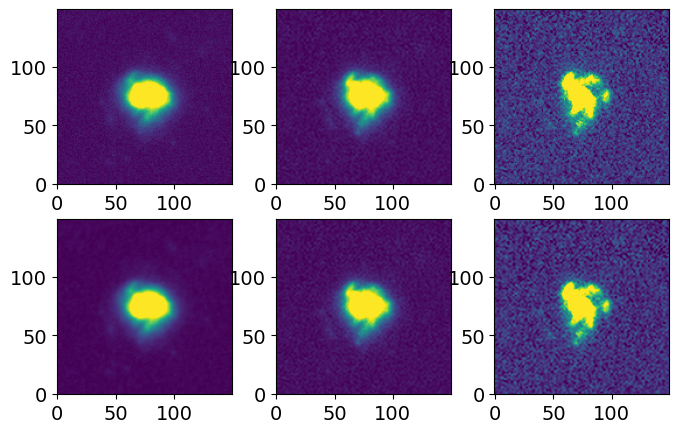

In [61]:
fig, axarr = plt.subplots(2,3,figsize=(8,5))

ek.imshow(bbmb.image['r'], ax=axarr[0,0])
ek.imshow(bbmb.matched_image['r'], ax=axarr[1,0])

ek.imshow(bbmb.image['n708'], ax=axarr[0,1])
ek.imshow(bbmb.matched_image['n708'], ax=axarr[1,1])

ek.imshow(bbmb.image['n708']-bbmb.image['r'], ax=axarr[0,2])
ek.imshow(bbmb.matched_image['n708'] - bbmb.matched_image['r'], ax=axarr[1,2])

In [112]:
ls -t /Users/kadofong/Downloads/

cutout_152.4086_1.8882.fits
cutout_152.2084_1.8224.fits
cutout_151.9272_1.9669.fits
arXiv-1802.10157v2/
legacy_cutout/
arXiv-1802.10157v2.tar.gz
HealpixGridRefinement.jpg
ImageCoadditionAndSubtraction.pdf
pasj_70_sp1_s5.pdf
cosmic.ps.gz
ztf/
Screenshot_from_2020-02-26_19-32-13.png
SAGAbgIII_rrr.pdf
SAGAbgIII_SHMR-1.pdf
SAGAbgIII_SHMR.pdf
PXL_20250126_164537457.MP (1).jpg
jrnew.html
byol_test.ipynb
sfig/
2019-fit_manual.pdf
starlet/
Supplier W-9.pdf
FA621947-803C-49F1-964F-B558F9B7F004.png
Zoom(1).pkg
Supplier Payment Setup WIRE TRANSFER (3401 FR.01).pdf
Supplier Payment Setup ACH-EFT (3401 FR.02).pdf
Supplier Contact Form (3401 FR.03).pdf
Chapter_Starlet2011.pdf
SAGA host lists - host list (10-04-2023-v0.64.0)(1).csv
Program – CIERA Fellows at 15.pdf
starlet.py
f-quench-3.svg
mcmc.ics
f-quench-3.png
f-quench-noSAGA.png
yanfei_researchhighlight_edited.pages*
yanfei_researchhighlight_editedv2.docx
cover_options.pptx
cover_options.key
yanfei_researchhighlight_edited(1).docx
yanfei_researc

In [113]:
x = fits.getdata('/Users/kadofong/Downloads/cutout_152.4086_1.8882.fits', 0)

In [123]:
import sep
from astropy import table
from ekfstats import fit, sampling

In [124]:
cat, segmap = sep.extract(x[2].byteswap().newbyteorder(), 5., err=sampling.sigmaclipped_std(x[2,:50,:50]), segmentation_map=True)
cat = table.Table(cat)

In [160]:
scene = fit.fit_multi_sersic_2d(x[2], cat['x'], cat['y'], init_theta=cat['theta'], init_ellip=1.-cat['b']/cat['a'], init_r_eff=cat['a']*1.5)

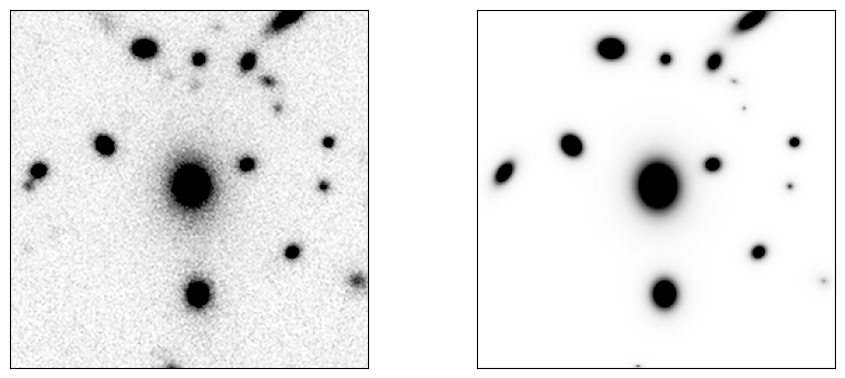

In [165]:
fig, axarr = plt.subplots(1,2,figsize=(10,4))
ek.imshow(x[2], ax=axarr[0], cmap='Greys')
skybg = np.random.normal(0., sampling.sigmaclipped_std(x[2,:50,:50]), scene[1].shape)
ek.imshow(scene[1], ax=axarr[1], cmap='Greys')

for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout ()

(<matplotlib.image.AxesImage at 0x31324ebc0>, <Axes: >)

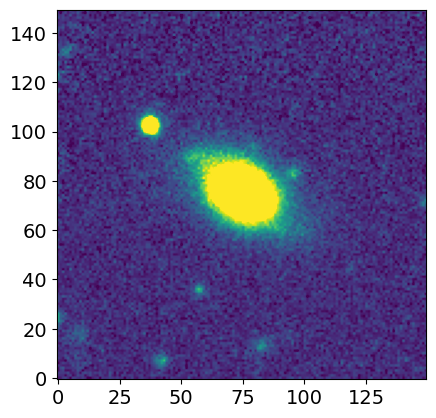

In [9]:
ek.imshow(bbmb.image['i'])

In [62]:
from ekfstats import functions

Text(0, 0.5, 'PSF intensity')

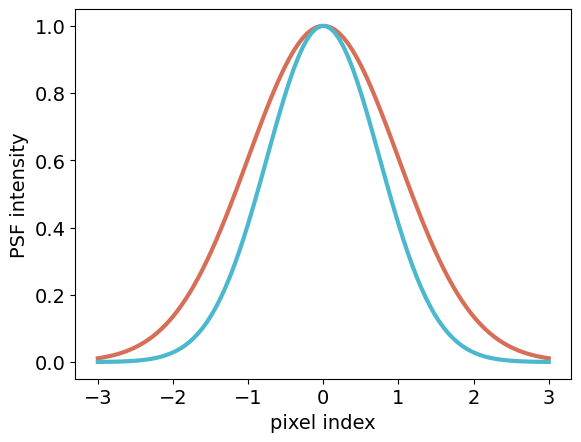

In [70]:
xs = np.linspace(-3.,3.,100)
plt.plot(xs, functions.gaussian(xs,1., 0., 1.), lw=3, color='#D66E58')
plt.plot(xs, functions.gaussian(xs,1., 0., 0.75), lw=3, color='#4BB8CD')
plt.xlabel('pixel index')
plt.ylabel('PSF intensity')

In [71]:
from astropy.modeling.functional_models import Sersic1D

In [85]:
amp

0.03999999999999925

Text(0, 0.5, 'Surface brightness')

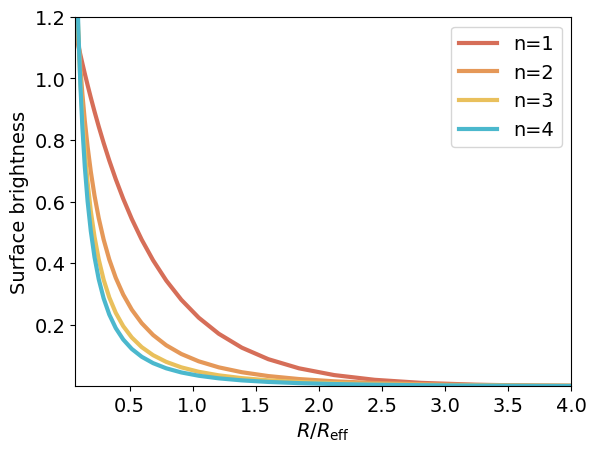

In [98]:
color_lists = ['#D66E58','#E59858', '#E9C05C', '#4BB8CD']
xs = np.logspace(-2, 1)
lr = 0.001
for n in range(1,5):
    amp = 1.
    smod = Sersic1D(amplitude=amp, n=n)

    while abs(smod(0.1) - 1.)>0.1:
        update = np.sign(1.-smod(0.1))*lr
        amp += update
        smod = Sersic1D(amplitude=amp, n=n)
    
    plt.plot(xs, smod(xs), color=color_lists[n-1], lw=3, label=f'n={n}')
plt.legend()
plt.ylim(3e-5,1.2)
plt.xlim(0.07,4.)
plt.xlabel(r'$R/R_{\rm eff}$')
plt.ylabel('Surface brightness')

In [399]:
source_cat,sources = sep.extract( bbmb.image['i'].byteswap().newbyteorder(), 
                                 3, 
                                 var=bbmb.var['i'].byteswap().newbyteorder(), 
                                 segmentation_map=True)
central_source = sources[sources.shape[0]//2, sources.shape[1]//2]
csource = np.where(sources==central_source, 1, 0)
sources = np.where(sources==central_source, 0, sources)

In [402]:
use_gen2 = True
vm = np.random.normal(0., bbmb.var['i']**0.5)
wt = imstats.starlet_transform(np.where(sources>0, 0., bbmb.image['i']), gen2=use_gen2)
segmap_l = []
im_recon = []
for ix in range(0,len(wt)):
    err_samples = [
        np.std(abs(wt[ix])[:25,-25:]),
        np.std(abs(wt[ix])[-25:,-25:]),
        np.std(abs(wt[ix])[:25,:25]),
        np.std(abs(wt[ix])[-25,:25])
    ]
    
    _,segmap = sep.extract ( abs(wt[ix]), 10., err=np.median(err_samples), segmentation_map=True, deblend_cont=1.)
    sidx = segmap[segmap.shape[0]//2,segmap.shape[0]//2]
    #print(sidx)
    segmap_l.append(segmap)
    im_recon.append (np.where(segmap==sidx, wt[ix], 0.))
    #np.where((segmap==sidx)|((segmap>0)&(sources>0))
im_recon = imstats.inverse_starlet_transform(im_recon, gen2=use_gen2)
hf_image = bbmb.image['i'] - im_recon
hf_image = hf_image - ndimage.median_filter(hf_image, size=20)
hf_image = np.where(sources>0, vm, hf_image)

err_samples = [
    np.std(hf_image[:25,-25:]),
    np.std(hf_image[-25:,-25:]),
    np.std(hf_image[:25,:25]),
    np.std(hf_image[-25,:25])
]

_,lsb_features = sep.extract(hf_image, 1, err=np.median(err_samples), deblend_cont=1., segmentation_map=True )
minarea = np.pi*(bbmb.measure_psfsizes()[0][np.in1d(bbmb.bands, 'i')])**2
feature_cat,hsb_features = sep.extract(hf_image, 2, err=np.median(err_samples), segmentation_map=True, minarea=minarea )
ellips = table.Table(feature_cat)['b']/table.Table(feature_cat)['a']
for hidx in np.unique(hsb_features)[1:]:
    if ellips[hidx-1] > 0.6:
        hsb_features[hsb_features == hidx] = 0

features = np.zeros_like(hsb_features)
areas = ndimage.sum(np.where(features>0,1,0),labels=features, index=np.unique(features)[1:])

for ix in np.unique(lsb_features)[1:]:
    if (hsb_features[lsb_features==ix]>0).any():
        features[lsb_features==ix] = 1
features = ndimage.label(features)[0]
rmag = -2.5*np.log10(ndimage.sum_labels(bbmb.image['i'], features, np.unique(features)[1:])) + 27.


/var/folders/fs/f3k7bp2n3k1bldhn58thddt40000gn/T/ipykernel_93763/555880327.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  feature_cat,hsb_features = sep.extract(hf_image, 2, err=np.median(err_samples), segmentation_map=True, minarea=minarea )


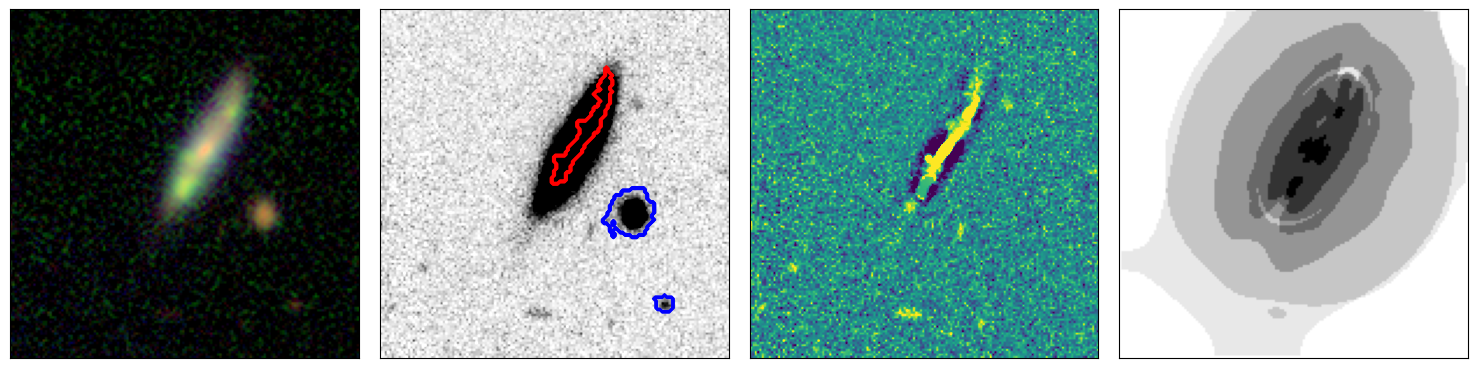

In [403]:
fig, axarr = plt.subplots(1,4,figsize=(15,4))
ek.imshow(hf_image, q=0.01,ax=axarr[2], cmap='viridis',)# qlow=sampling.get_quantile_of_value(hf_image.flatten(), 0.))
ek.contour(features,ax=axarr[1], colors='r')
ek.contour(sources, ax=axarr[1], colors='b')
ek.imshow(make_lupton_rgb(bbmb.image['i'],bbmb.image['n708'],bbmb.image['r'], stretch=1, Q=7), axarr[0])
ek.imshow(bbmb.image['i'], q=0.05,ax=axarr[1], cmap='Greys')
axarr[3].imshow(np.sum(np.array(segmap_l).astype(bool).astype(int),axis=0), origin='lower', cmap='Greys')

for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout ()

In [335]:
dd = np.load(
    '/Users/kadofong/work/projects/merian/pixel_excess/local_data/pieridae_output/starlet_qa/M3123725728651166755/M3123725728651166755_results.npy',
    allow_pickle=True
)

15.0


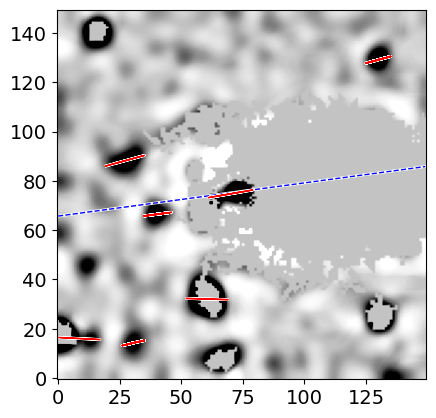

In [283]:
ridge_stats = []
for feat in np.arange(1,np.max(features)+1):
    rout = fit.fit_ridgeline_image( hf_image, features==feat, order=1, return_stats=True)
    # coefficients, predict_func, fitted_coordinates,stats = rout
    ridge_stats.append(rout)
csersic, cim = fit.fit_sersic_2d(np.where(csource, bbmb.image['i'],0.))

xs = np.arange(cim.shape[1])
ys = np.arctan(csersic.theta.value)*(xs-csersic.x_0.value) + csersic.y_0.value

ek.imshow(hf_image, cmap='Greys')
#ek.outlined_plot(central_fitted_coordinates['x'], central_predict_func(central_fitted_coordinates['x']), color='b', lw=1)
#ek.contour(cim, colors='b')
ek.outlined_plot(xs, ys, color='b', ls='--', lw=1)

for rout in ridge_stats:
    coefficients, predict_func, fitted_coordinates,stats = rout
    ek.outlined_plot(fitted_coordinates['x'], predict_func(fitted_coordinates['x']), color='r', lw=1)


In [290]:
from astropy import cosmology
cosmo = cosmology.FlatLambdaCDM(70.,0.3)

In [291]:
rmag = -2.5*np.log10(csersic.luminosity) + 27.
rmag_catalog = -2.5*np.log10(catalog.loc[targetid,'r_cModelFlux_Merian']*1e-9/3631.)

logmstar_adjusted = 0.4*(rmag_catalog - rmag) + catalog.loc[targetid,'logmass']

In [292]:
rmag_seg = -2.5*np.log10(table.Table(source_cat)[central_source-1]['flux']) + 27.
absmag_r =  rmag_seg - cosmo.distmod(0.08).value

In [293]:
absmag_r

-19.11577666824263

In [288]:
0.4*(rmag_catalog - rmag_seg) + catalog.loc[targetid,'logmass']

8.791589166328547

In [289]:
catalog.loc[targetid,'logmass']

7.799780481898868

In [352]:
from astropy import cosmology 
cosmo = cosmology.FlatLambdaCDM(70.,0.3)

In [356]:
# Lr_0/M_0 = Lr_1/M_1
# -2.5*log10(Lr_0) + 2.5log(M*_0) = -2.5log(Lr_1) + 2.5log(M*_1)
# Mr_0 + 2.5log(M*_0) = Mr_1 + 2.5log(M*_1)
# 2.5log(M*_adjusted) = Mr_orig - Mr_adjusted + 2.5log(M*_1)
# log10(M*_adjusted) = 0.4*(Mr_orig - Mr_adjusted) + log10(M*_orig)

In [ ]:
np.log10(

In [183]:
np.arctan(table.Table(source_cat)[central_source-1]['theta'])

-0.03221020313712338

In [184]:
table.Table(source_cat)[central_source-1]['b']/table.Table(source_cat)[central_source-1]['a']

0.5516803784198054

15.0


In [192]:
np.arctan(csersic.theta.value)

0.7989752853802662

In [170]:
row = catalog.loc['M3037422861963769414']
print(conventions.produce_merianobjectname(row.RA, row.DEC))
print(row.logmass)

J023311.35-053336.32
9.574324150670062


In [103]:
from astropy.visualization import make_lupton_rgb

(<matplotlib.image.AxesImage at 0x3129d2c50>, <Axes: >)

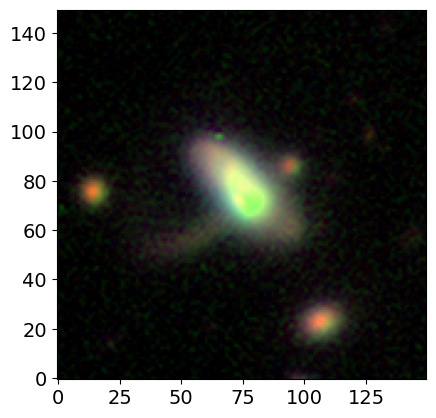

In [117]:
ek.imshow(
    make_lupton_rgb(bbmb.image['i'], bbmb.image['n708'], bbmb.image['r'], stretch=3, Q=5)
)